In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [6]:
start= '2012-01-01'
end= '2022-10-24'

df= data.DataReader('AAPL', 'yahoo', start, end)
df.head()

TypeError: string indices must be integers

In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-18,146.699997,140.610001,145.490005,143.750000,99136600.0,143.511932
2022-10-19,144.949997,141.500000,141.690002,143.860001,61758300.0,143.621750
2022-10-20,145.889999,142.649994,143.020004,143.389999,64522000.0,143.152527
2022-10-21,147.850006,142.649994,142.869995,147.270004,86548600.0,147.026108
2022-10-24,150.229996,146.000000,147.190002,149.449997,75981900.0,149.202484


In [4]:
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519279
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586558
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726297
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859334
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838937


In [5]:
df= df.drop(['Date', 'Adj Close'], axis= 1)
df.head()

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0


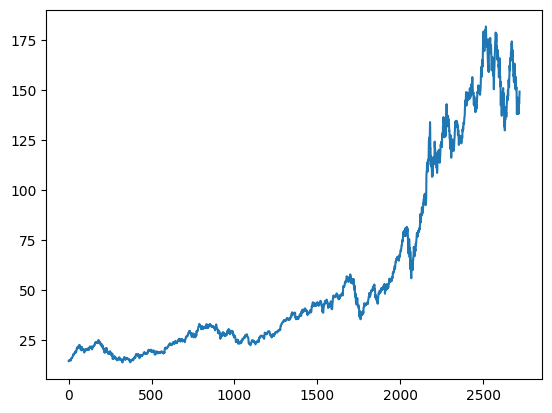

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0
...,...,...,...,...,...
2716,146.699997,140.610001,145.490005,143.750000,99136600.0
2717,144.949997,141.500000,141.690002,143.860001,61758300.0
2718,145.889999,142.649994,143.020004,143.389999,64522000.0
2719,147.850006,142.649994,142.869995,147.270004,86548600.0


In [8]:
ma100= df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2716    151.2860
2717    151.2868
2718    151.2243
2719    151.2086
2720    151.2160
Name: Close, Length: 2721, dtype: float64

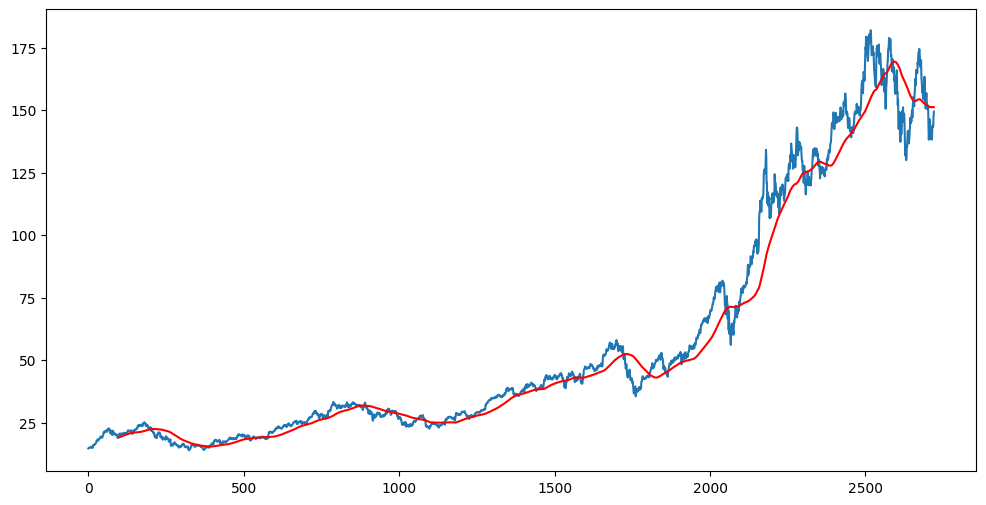

In [9]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2716    157.82970
2717    157.63895
2718    157.45740
2719    157.31915
2720    157.20640
Name: Close, Length: 2721, dtype: float64

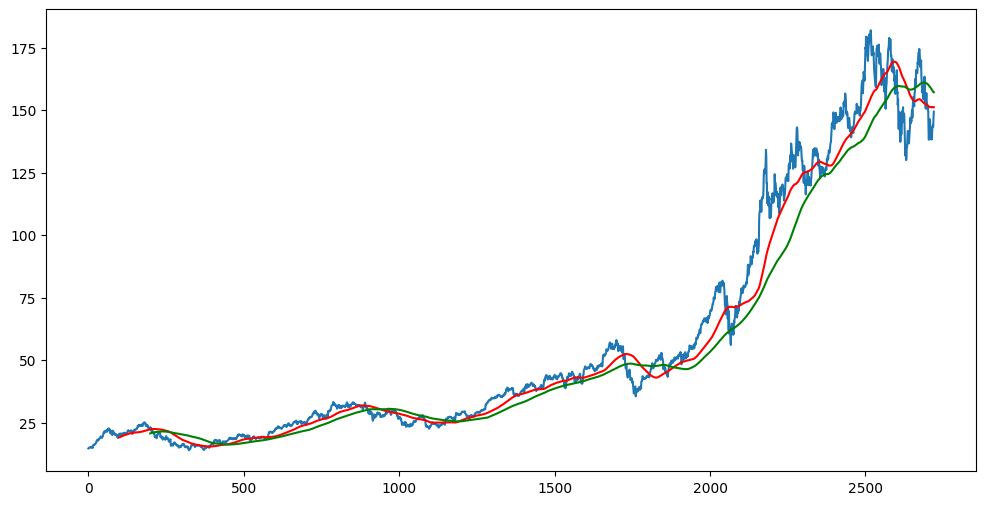

In [11]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2721, 5)

In [13]:
# Training & Testing Dataset

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1904, 1)
(817, 1)


In [14]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [15]:
data_testing.head()

,Close
1904,52.195000
1905,53.259998
1906,52.107498
1907,51.005001
1908,48.334999


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range= (0,1))

In [17]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.85789652],
       [0.86198093],
       [0.87298608]])

In [18]:
data_training_array.shape

(1904, 1)

In [20]:
x_train= []
y_train= []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [21]:
# ModeL

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model= Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True,
              input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))



model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))



model.add(LSTM(units= 120, activation= 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units= 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
57/57 [==============================] - 33s 372ms/step - loss: 0.0441
Epoch 2/50
57/57 [==============================] - 21s 371ms/step - loss: 0.0108
Epoch 3/50
57/57 [==============================] - 21s 374ms/step - loss: 0.0085
Epoch 4/50
57/57 [==============================] - 21s 373ms/step - loss: 0.0070
Epoch 5/50
57/57 [==============================] - 21s 374ms/step - loss: 0.0066
Epoch 6/50
57/57 [==============================] - 22s 389ms/step - loss: 0.0061
Epoch 7/50
57/57 [==============================] - 22s 390ms/step - loss: 0.0067
Epoch 8/50
57/57 [==============================] - 23s 407ms/step - loss: 0.0058
Epoch 9/50
57/57 [==============================] - 25s 430ms/step - loss: 0.0050
Epoch 10/50
57/57 [==============================] - 23s 399ms/step - loss: 0.0055
Epoch 11/50
57/57 [==============================] - 22s 394ms/step - loss: 0.0053
Epoch 12/50
57/57 [==============================] - 23s 404ms/step - loss: 0.0049
Epoch 13/50
5

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
1904,52.195000
1905,53.259998
1906,52.107498
1907,51.005001
1908,48.334999


In [28]:
data_training.tail(100)

,Close
1804,43.125000
1805,43.227501
1806,44.724998
1807,45.227501
1808,45.427502
...,...
1899,52.209999
1900,52.167500
1901,51.755001
1902,51.935001


In [29]:
past_100_days= data_training.tail(100)

In [30]:
final_df= past_100_days.append(data_testing, ignore_index= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8172\2699728040.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing, ignore_index= True)


In [31]:
final_df.head()

,Close
0,43.125000
1,43.227501
2,44.724998
3,45.227501
4,45.427502


In [32]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [7.38027286e-04],
       [1.15203120e-02],
       [1.51384311e-02],
       [1.65784769e-02],
       [2.02145591e-02],
       [2.45166786e-02],
       [2.79367910e-02],
       [2.52547059e-02],
       [2.81887970e-02],
       [4.06631336e-02],
       [3.33909418e-02],
       [2.92328296e-02],
       [2.57227092e-02],
       [2.87468082e-02],
       [2.91968209e-02],
       [3.14108753e-02],
       [3.37329557e-02],
       [3.87370939e-02],
       [4.11311643e-02],
       [4.17431749e-02],
       [4.41012366e-02],
       [4.96814040e-02],
       [4.86013628e-02],
       [5.06174105e-02],
       [4.76113295e-02],
       [4.74673222e-02],
       [4.81153414e-02],
       [4.81513501e-02],
       [5.51355548e-02],
       [5.64495839e-02],
       [5.76556144e-02],
       [6.29657578e-02],
       [6.23897560e-02],
       [5.90056523e-02],
       [5.72416105e-02],
       [5.77996218e-02],
       [5.07074185e-02],
       [6.84379267e-02],
       [6.59718388e-02],


In [33]:
input_data.shape

(917, 1)

In [34]:
x_test= []
y_test= []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(817, 100, 1)
(817,)


In [36]:
#Predictions

y_predicted= model.predict(x_test)

26/26 [==============================] - 2s 53ms/step


In [37]:
y_predicted.shape

(817, 1)

In [38]:
y_test

array([0.06530583, 0.07297403, 0.0646758 , 0.0567376 , 0.03751305,
       0.04410124, 0.04777333, 0.05567555, 0.05128345, 0.0503654 ,
       0.06564784, 0.05445153, 0.05263349, 0.06120172, 0.06813192,
       0.06814991, 0.07225402, 0.07193003, 0.05425352, 0.06118373,
       0.0569896 , 0.05945566, 0.06571983, 0.06523384, 0.05976167,
       0.06604386, 0.07340606, 0.07337005, 0.0750081 , 0.07956223,
       0.09196457, 0.09106455, 0.08325233, 0.08532238, 0.08676243,
       0.09048854, 0.08723046, 0.08141628, 0.08319834, 0.08132627,
       0.08735645, 0.08530439, 0.08337835, 0.0926486 , 0.09376462,
       0.08363036, 0.08697845, 0.09812074, 0.09821075, 0.09342261,
       0.09815675, 0.1036649 , 0.11468123, 0.11406919, 0.11307918,
       0.11136911, 0.11300717, 0.11504123, 0.12242142, 0.12143142,
       0.12722755, 0.12794759, 0.13334774, 0.13779387, 0.12742556,
       0.12737156, 0.13727184, 0.14998022, 0.15300429, 0.15233828,
       0.15253626, 0.15647837, 0.15775645, 0.16146455, 0.16103

In [39]:
y_predicted

array([[0.10154231],
       [0.1022229 ],
       [0.10295162],
       [0.10368004],
       [0.10427709],
       [0.10449272],
       [0.1042023 ],
       [0.10342704],
       [0.1023445 ],
       [0.10112217],
       [0.09989892],
       [0.09891729],
       [0.09824872],
       [0.0978685 ],
       [0.09779048],
       [0.09805985],
       [0.09867512],
       [0.09961972],
       [0.10083275],
       [0.10206804],
       [0.10315573],
       [0.10395543],
       [0.10441396],
       [0.10459785],
       [0.10460091],
       [0.10446529],
       [0.10428429],
       [0.10420576],
       [0.10433246],
       [0.10471982],
       [0.10540727],
       [0.10649228],
       [0.10798925],
       [0.1097708 ],
       [0.11168966],
       [0.11361355],
       [0.1154322 ],
       [0.117071  ],
       [0.11842078],
       [0.11942568],
       [0.12006098],
       [0.12040177],
       [0.12052788],
       [0.1205    ],
       [0.12046129],
       [0.12053847],
       [0.12070873],
       [0.120

In [40]:
scaler.scale_

array([0.0072002])

In [41]:
scale_factor= 1/0.0072002
y_predicted= y_predicted*scale_factor
y_test= y_test*scale_factor

In [2]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [1]:
! pip install pandas_datareader